# Проект: Статистический анализ данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

#### Шаг 1. Загрузка данных

In [2]:
data_users_go = pd.read_csv('/datasets/users_go.csv')

In [3]:
data_users_go.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [4]:
data_rides_go = pd.read_csv('/datasets/rides_go.csv')

In [5]:
data_rides_go.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [6]:
data_subscriptions_go = pd.read_csv('/datasets/subscriptions_go.csv')

In [7]:
data_subscriptions_go.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [8]:
data_users_go.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


В датафрейме 5 столбцов: ID пользователей, имя, возраст, город, тип подписки. Названия столбцов корректные. 1565 строк, данные представлены целыми числами и тип данных object.

In [9]:
data_rides_go.info() # пропусков нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


В датафрейме 5 столбцов: ID пользователей, расстояние, продолжительность поездки, дата, месяц. Названия столбцов корректные. 18068 строк, данные представлены целыми и дробными числами, и datetime.

In [10]:
data_subscriptions_go.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


В датафрейме 4 столбца: тип подписки, цена за минуту, цена за старт, цена подписки. Названия столбцов корректные. 2 строки, данные представлены целыми числами и типом данных object.

#### Шаг 2. Предобработка данных

In [11]:
data_rides_go['date'] = pd.to_datetime(data_rides_go['date'], format = '%Y-%m-%d') 

In [12]:
print(data_rides_go['date'].min())
print(data_rides_go['date'].max())

2021-01-01 00:00:00
2021-12-30 00:00:00


In [13]:
data_rides_go['month'] = data_rides_go['date'].dt.month

In [14]:
data_rides_go.head() # добавим столбец с числом месяца

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


# Проверим пропуски в датафреймах

In [15]:
data_users_go.isna().sum() # пропусков нет

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [16]:
data_rides_go.isna().sum() # пропусков нет

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [17]:
data_subscriptions_go.isna().sum() # пропусков нет

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

# Проверим дубликаты в датафреймах

In [18]:
data_users_go_dublicates = data_users_go.duplicated()
print(data_users_go_dublicates.sum())
# кол-во явных дубликатов 31

31


In [19]:
data_users_go_dublicates = data_users_go[data_users_go.duplicated()].head() # датафрейм с дубликатами
print(data_users_go_dublicates) 

      user_id        name  age          city subscription_type
1534      293       Агата   26     Краснодар             ultra
1535       16      Амалия   27     Краснодар             ultra
1536      909  Константин   20  Екатеринбург              free
1537      403      Полина   19          Сочи             ultra
1538      908      Рустам   30        Тюмень              free


In [20]:
data_users_go = data_users_go.drop_duplicates().reset_index()  #удалю явные дубликаты и обновлю индексацию
print(data_users_go.head())

   index  user_id        name  age            city subscription_type
0      0        1        Кира   22          Тюмень             ultra
1      1        2   Станислав   31            Омск             ultra
2      2        3     Алексей   20          Москва             ultra
3      3        4  Константин   26  Ростов-на-Дону             ultra
4      4        5       Адель   28            Омск             ultra


In [21]:
data_users_go_dublicates = data_users_go.duplicated()
print(data_users_go_dublicates.sum())
# проверю явные дубликаты еще раз

0


In [22]:
data_rides_go_dublicates = data_rides_go.duplicated()
print(data_rides_go_dublicates.sum())
# дубликаты отсутствуют

0


In [23]:
data_subscriptions_go_dublicates = data_subscriptions_go.duplicated()
print(data_subscriptions_go_dublicates.sum())
# дубликаты отсутствуют

0


In [24]:
data_users_go.name.unique() 
#проверю неявные дубликаты в столбце name, возможно Софья vs София,но оба имени существуют

array(['Кира', 'Станислав', 'Алексей', 'Константин', 'Адель', 'Регина',
       'Игорь', 'Юрий', 'Ян', 'Валерий', 'Агата', 'Марк', 'Ева',
       'Антонина', 'Валерия', 'Амалия', 'Даниил', 'Аделина', 'Святогор',
       'Борис', 'Вероника', 'Ростислав', 'Назар', 'Эдуард', 'Василий',
       'Денис', 'Тамара', 'Николай', 'Эвелина', 'Федор', 'Руслан', 'Иван',
       'Любовь', 'Ярослава', 'Майя', 'Ильдар', 'Данила', 'Нина',
       'Стефания', 'Ясмина', 'Дмитрий', 'Александр', 'Одиссей', 'Арсений',
       'Алла', 'Таисия', 'Максим', 'Юлиана', 'Павел', 'Карина', 'Алиса',
       'Лидия', 'Рамиль', 'Родион', 'Ника', 'Оксана', 'Анастасия',
       'Маргарита', 'Вера', 'Тимур', 'Никита', 'Лев', 'Влад', 'Артур',
       'Анна', 'Ольга', 'Вячеслав', 'Ксения', 'Виталина', 'Владислав',
       'Тамерлан', 'Амина', 'Вадим', 'Олеся', 'Зарина', 'Егор', 'Гордей',
       'Лилия', 'Святослав', 'Роберт', 'Амир', 'Влада', 'Богдан',
       'Полина', 'Марат', 'Елисей', 'Макар', 'Алина', 'Глеб', 'Андрей',
       'Ал

In [25]:
name_unique = data_users_go.name.unique()
unique_name_amount = len(name_unique)
print('Количество уникальных имен пользователей: ', unique_name_amount)
user_id_unique = data_users_go.user_id.unique()
unique_user_id_amount = len(user_id_unique)
print('Количество уникальных пользователей из 1565 строк: ', unique_user_id_amount)

Количество уникальных имен пользователей:  194
Количество уникальных пользователей из 1565 строк:  1534


In [26]:
data_users_go.city.unique() 

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

In [27]:
data_users_go.subscription_type.unique() 

array(['ultra', 'free'], dtype=object)

In [28]:
user_id_unique_go = data_rides_go.user_id.unique()
unique_user_id_go_amount = len(user_id_unique_go)
print('Количество уникальных пользователей', unique_user_id_go_amount)
# проверил совпадает количество уникальных ID в датафреймах

Количество уникальных пользователей 1534


Проверил наличие явных и неявных дубликатов в датафреймах, проверил уникальные значения в датафреймах. Удалил явные дубликаты в датафрейме data_users_go. 

#### Шаг 3. Исследовательский анализ данных

# Частота встречаемости городов

In [29]:
city_amount = data_users_go['city'].value_counts()

In [30]:
print(city_amount)

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64


Text(0.5, 1.0, 'Количество пользователей по городам')

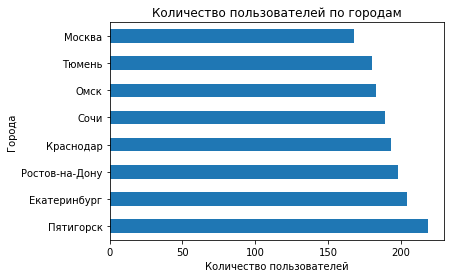

In [31]:
data_users_go.groupby('city')['city'].count().sort_values(ascending=False).plot(kind='barh');
plt.ylabel('Города')
plt.xlabel('Количество пользователей')
plt.title('Количество пользователей по городам')

Чаще всего в данных встречается город Пятигорск, самый редкий - Москва.

# Cоотношение пользователей с подпиской и без подписки

In [32]:
free_subscriber = data_users_go[data_users_go['subscription_type'] == 'free'].shape[0]
print('Подписчики без подписки:', free_subscriber)
ultra_subscriber = data_users_go[data_users_go['subscription_type'] == 'ultra'].shape[0]
print('Подписчики с подпиской:', ultra_subscriber)

Подписчики без подписки: 835
Подписчики с подпиской: 699


45.56714471968709
54.43285528031291


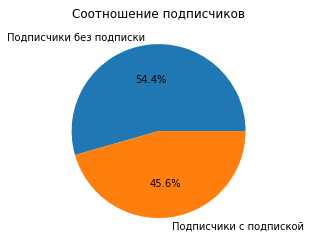

In [33]:
total_subscriber = free_subscriber + ultra_subscriber
subscriber_ratio_ultra = ultra_subscriber / total_subscriber * 100
print(subscriber_ratio_ultra)
subscriber_ratio_free = free_subscriber / total_subscriber * 100
print(subscriber_ratio_free)

names_sector = ['Подписчики без подписки', 'Подписчики с подпиской']
plt.pie([subscriber_ratio_free, subscriber_ratio_ultra], labels=names_sector, autopct='%1.1f%%')
plt.title('Соотношение подписчиков')

plt.show()

Text(0.5, 0, 'Тип подписчика')

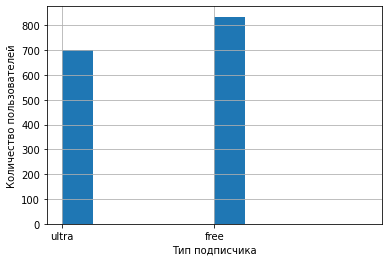

In [34]:
data_users_go['subscription_type'].hist(range=(0, 2), bins = 10);
plt.ylabel('Количество пользователей')
plt.xlabel('Тип подписчика')

In [35]:
ratio_subscriber = free_subscriber / ultra_subscriber
print(ratio_subscriber)
# Подписчиков без подписки на 18% больше, чем подписчиков с подпиской

1.1945636623748213


# Возраст пользователей

Text(0.5, 0, 'Возраст')

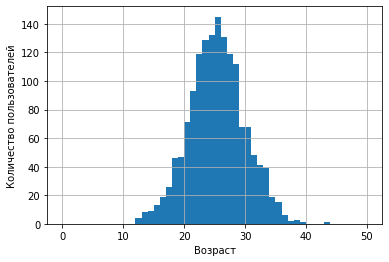

In [36]:
data_users_go['age'].hist(range=(0, 50), bins = 50);
plt.ylabel('Количество пользователей')
plt.xlabel('Возраст')

In [37]:
data_users_go['age'].describe() 
# средний возраст пользователей почти 25 лет, минимальный возраст 12 лет, максимальный возраст 43 года.

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

old_users = data_users_go.query('age > 40')
print(old_users) # проверю данные пользователей, которые старше 40 лет, это аномальное значение вдруг что-то не так

In [38]:
user_1202 = data_users_go[data_users_go['user_id'] == 1202].shape[0]
print(user_1202) # пользователь старше 43 лет использовал самокат всего один раз, на данные никак не повлияет

1


Вывод: целевая аудитория пользователей сервиса сосредоточена в возрасте от 20 до 30 лет.

# Расстояние, которое пользователь преодолел за одну поездку

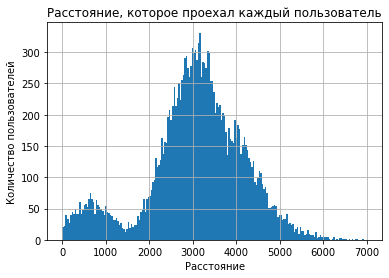

In [39]:
data_rides_go['distance'].hist(range=(0, 7000), bins = 200);
plt.title('Расстояние, которое проехал каждый пользователь')
plt.ylabel('Количество пользователей')
plt.xlabel('Расстояние');

In [40]:
data_rides_go['distance'].max().round(2) # максимальная дистанция 7211.01 м

7211.01

Вывод: Чаще всего пользователи проезжают от 2500 до 4000 метров за одну поездку, пиковое значение находитсяпримерно на 3100 метров, второе пиковое значение находится на дистанции 700-800 метров, скорее всего это происходит из-за недостаточности заряда самоката или это просто пробная(тестовая) поездка.

# Продолжительность поездок

In [41]:
data_rides_go

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8
...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11
18064,1534,2840.423057,21.409799,2021-11-16,11
18065,1534,3826.185507,18.435051,2021-11-18,11
18066,1534,2902.308661,16.674362,2021-11-27,11


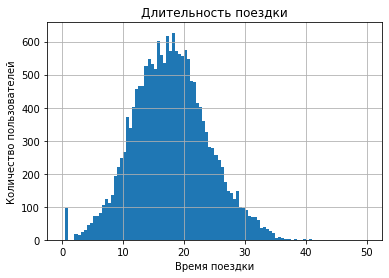

In [42]:
data_rides_go['duration'].hist(range=(0, 50), bins = 100);
plt.title('Длительность поездки')
plt.ylabel('Количество пользователей')
plt.xlabel('Время поездки');
# встречаются поездки близкие к 0 мин., возможно это происходит когда пользователь передумал или что-то случилось с самокатом

In [43]:
duration_low = data_rides_go[data_rides_go['duration'] < 2]
print(duration_low)
duration_low_count = data_rides_go[data_rides_go['duration'] < 2].count()
print(duration_low_count)

       user_id     distance  duration       date  month
6531       701  4196.445201       0.5 2021-08-31      8
6570       704  4830.824371       0.5 2021-10-14     10
6680       712  4684.004397       0.5 2021-03-04      3
6695       713  5215.642710       0.5 2021-02-25      2
6768       718  5197.436649       0.5 2021-02-11      2
...        ...          ...       ...        ...    ...
17004     1460  5531.335845       0.5 2021-01-19      1
17242     1477  6724.932981       0.5 2021-01-12      1
17314     1483  4445.481070       0.5 2021-03-06      3
17505     1496  5722.551787       0.5 2021-02-14      2
17909     1524  4103.998874       0.5 2021-06-18      6

[95 rows x 5 columns]
user_id     95
distance    95
duration    95
date        95
month       95
dtype: int64


Проверил пользователей с продолжительностью поездки меньше 2 минут, таких пользователей 95, выяснил, что дистанция, которую они могут проехать за такое короткое время может составлять несколько километров, это скорее всего ошибка, необходимо получить дополнительную информацию по датафрейму

# Чаще всего поездки длятся от 10 до 23-24 минут.

#### Шаг 4. Объединение данных

In [44]:
data_general = data_users_go.merge(data_rides_go, on='user_id', how='left')
data_general['duration'] = np.ceil(data_general['duration'])
display(data_general.sample(5))

,index,user_id,name,age,city,subscription_type,distance,duration,date,month
12822,1161,1162,Вера,14,Ростов-на-Дону,free,4760.697751,19.0,2021-07-16,7
10232,973,974,Нелли,34,Москва,free,3578.818821,27.0,2021-02-02,2
10107,964,965,Святослав,23,Пятигорск,free,3278.506907,13.0,2021-09-07,9
11583,1070,1071,Захар,26,Пятигорск,free,3635.094136,15.0,2021-01-19,1
17333,1483,1484,Алёна,24,Сочи,free,1995.224064,15.0,2021-09-30,9


In [45]:
data_general.count()
data_rides_go.count()
# количество строк до объединения и после объединения датафреймов совпадает

user_id     18068
distance    18068
duration    18068
date        18068
month       18068
dtype: int64

Датафрейм c данными о пользователях без подписки

In [46]:
data_general_free = data_general.loc[data_general['subscription_type'] == 'free', ['user_id', 'subscription_type', 'distance', 'duration']]
display(data_general_free.sample(5))

,user_id,subscription_type,distance,duration
17539,1498,free,3398.041233,14.0
11864,1091,free,2563.455632,20.0
11625,1073,free,2734.525811,18.0
15292,1338,free,4528.595641,20.0
8812,872,free,1929.225346,11.0


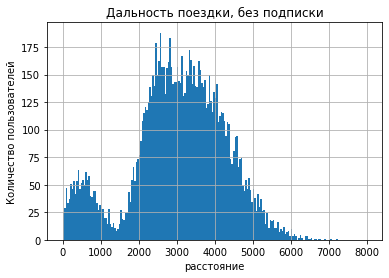

In [47]:
data_general_free['distance'].hist(range=(0, 8000), bins = 200);
plt.title('Дальность поездки, без подписки')
plt.ylabel('Количество пользователей')
plt.xlabel('расстояние');

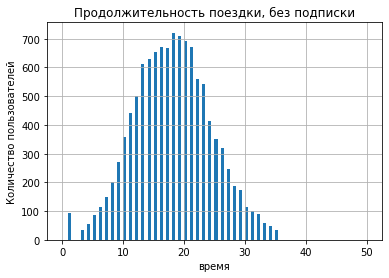

In [48]:
data_general_free['duration'].hist(range=(0, 50), bins = 100);
plt.title('Продолжительность поездки, без подписки')
plt.ylabel('Количество пользователей')
plt.xlabel('время');

Датафрейм c данными о пользователях с подпиской

In [49]:
data_general_ultra = data_general.loc[data_general['subscription_type'] == 'ultra', ['user_id', 'subscription_type', 'distance', 'duration']]
display(data_general_ultra.sample(5))

,user_id,subscription_type,distance,duration
463,50,ultra,307.532350,7.0
3765,404,ultra,4017.571728,22.0
4627,499,ultra,3203.523630,14.0
5557,592,ultra,3013.438327,19.0
2784,297,ultra,2922.976895,24.0


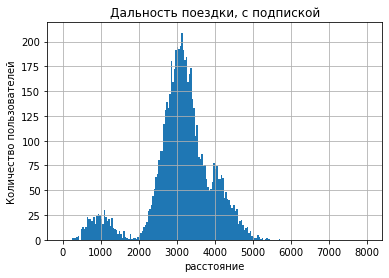

In [50]:
data_general_ultra['distance'].hist(range=(0, 8000), bins = 200); 
plt.title('Дальность поездки, с подпиской')
plt.ylabel('Количество пользователей')
plt.xlabel('расстояние');

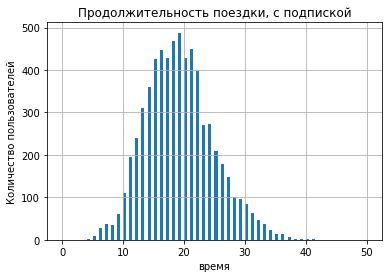

In [51]:
data_general_ultra['duration'].hist(range=(0, 50), bins = 100);
plt.title('Продолжительность поездки, с подпиской')
plt.ylabel('Количество пользователей')
plt.xlabel('время');

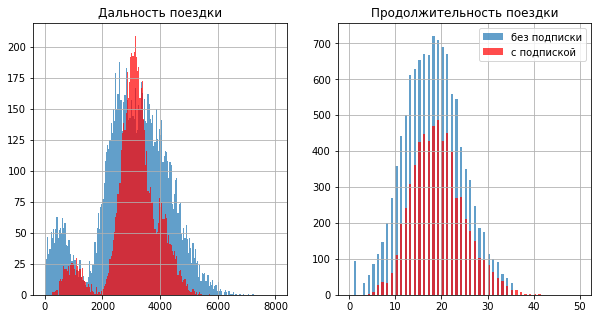

In [52]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

data_general_free['distance'].hist(range=(0, 8000), bins=200, alpha=0.7, ax=axs[0])

data_general_ultra['distance'].hist(range=(0, 8000), bins=200, alpha=0.7, ax=axs[0], color='red')
axs[0].set_title('Дальность поездки')

data_general_free['duration'].hist(range=(0, 50), bins=100, alpha=0.7, ax=axs[1])

data_general_ultra['duration'].hist(range=(0, 50), bins=100, alpha=0.7, ax=axs[1], color='red')
axs[1].set_title('Продолжительность поездки')

plt.legend(['без подписки', 'с подпиской'])

plt.show()

# для удобства анализа объединил гистограммы, синим цветом -пользователи без подписки, красным - пользователи с подпиской.

Вывод:

1) пользователи с подпиской совершают больше поездок в диапазоне от 2500 до 3500 метров, диапозон дальности поездок у пользователей без подписки шире от 2000 до 4500 метров. Но мы можем видеть, что среди пользователей без подписки намного больше тех, кто совершает короткие поездки. 

2) среди пользователей с подпиской нет тех, чье время проката сремится к 0, их продолжительность поездок чуть дольше, чем у пользователей без подписок.

#### Шаг 5. Подсчёт выручки

In [53]:
data_general_price = data_subscriptions_go.merge(data_general, on='subscription_type', how='left')
data_general_price['duration_price'] = data_general_price['minute_price'] * data_general_price['duration']
display(data_general_price.sample(10))
# объединю датафреймы для удобного подсчета ежемесячной выручки на 1 пользователя

,subscription_type,minute_price,start_ride_price,subscription_fee,index,user_id,name,age,city,distance,duration,date,month,duration_price
5358,free,8,50,0,1089,1090,Дмитрий,22,Ростов-на-Дону,4184.201172,21.0,2021-12-07,12,168.0
5584,free,8,50,0,1107,1108,Элина,24,Краснодар,3108.040927,11.0,2021-08-25,8,88.0
7828,free,8,50,0,1266,1267,Лиана,25,Краснодар,3126.109285,16.0,2021-07-04,7,128.0
16390,ultra,6,0,199,518,519,Даниэль,22,Ростов-на-Дону,4032.557255,18.0,2021-11-19,11,108.0
3701,free,8,50,0,971,972,Анна,16,Сочи,4536.095023,26.0,2021-01-25,1,208.0
11233,free,8,50,0,1510,1511,Элина,27,Краснодар,3815.649136,34.0,2021-12-16,12,272.0
16190,ultra,6,0,199,498,499,Каролина,25,Екатеринбург,4399.052661,24.0,2021-01-10,1,144.0
7795,free,8,50,0,1263,1264,Каролина,21,Пятигорск,2260.211720,16.0,2021-09-19,9,128.0
6975,free,8,50,0,1208,1209,Борис,16,Омск,2303.171547,12.0,2021-05-16,5,96.0
18017,ultra,6,0,199,693,694,Алия,29,Краснодар,773.352502,12.0,2021-02-06,2,72.0


In [54]:
data_general_monthly = data_general_price.pivot_table(index=['user_id', 'month'], values=['distance', 'duration', 'duration_price', 'start_ride_price', 'subscription_fee'], aggfunc={'distance': 'sum', 'duration': ['sum', 'count'], 'duration_price': 'sum', 'start_ride_price': 'mean', 'subscription_fee': 'mean',})
data_general_monthly.columns = ['monthly_distance', 'monthly_riders_count', 'monthly_duration', 'duration_income', 'start_income', 'subscription_fee_income']
display(data_general_monthly.sample(10))

# создам сводную таблицу с разбивкой на каждого пользователя и месяцу, благодаря этому получу возможность посчитать ежемесячную выручку на одного пользователя

,,monthly_distance,monthly_riders_count,monthly_duration,duration_income,start_income,subscription_fee_income
user_id,month,,,,,,
284,9,3366.467097,2,28.0,168.0,0,199
992,7,2835.238412,1,14.0,112.0,50,0
916,11,10472.254938,3,60.0,480.0,50,0
1188,2,2850.857194,2,24.0,192.0,50,0
1222,5,407.060379,1,7.0,56.0,50,0
454,12,5137.327103,1,41.0,246.0,0,199
525,4,3672.547654,1,16.0,96.0,0,199
744,12,4171.361985,1,33.0,264.0,50,0
867,3,6438.554563,2,34.0,272.0,50,0


In [55]:
data_general_monthly['common_income'] = data_general_monthly['duration_income'] + data_general_monthly['start_income'] * data_general_monthly['monthly_riders_count'] + data_general_monthly['subscription_fee_income']
display(data_general_monthly.sample(10))

,,monthly_distance,monthly_riders_count,monthly_duration,duration_income,start_income,subscription_fee_income,common_income
user_id,month,,,,,,,
772,12,4934.601271,2,25.0,200.0,50,0,300.0
947,2,3174.289938,1,24.0,192.0,50,0,242.0
1134,10,2826.133988,1,17.0,136.0,50,0,186.0
906,2,8578.641127,2,27.0,216.0,50,0,316.0
1006,1,7902.492164,2,52.0,416.0,50,0,516.0
1174,6,3546.127963,1,13.0,104.0,50,0,154.0
116,7,3489.981474,1,17.0,102.0,0,199,301.0
1501,3,2389.199126,1,13.0,104.0,50,0,154.0
1042,11,8714.276963,2,40.0,320.0,50,0,420.0


In [56]:
print(data_general_monthly['common_income'].sum().round(2))
# выручка за год

3878641.0


#### Шаг 6. Проверка гипотез

6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

Проверим гипотезу: 
Нулевая гипотеза: free_duration = ultra_duration.
Альтернативная гипотеза: ultra_duration > free_duration. 

In [57]:
free_duration_mean = data_general_price.query("subscription_type == 'free'")['duration'].mean()
print(free_duration_mean.round(2))
ultra_duration_mean = data_general_price.query("subscription_type == 'ultra'")['duration'].mean()
print(ultra_duration_mean.round(2))

17.89
19.04


In [58]:
results = st.ttest_ind(data_general_price.query("subscription_type == 'free'")['duration'], 
                       data_general_price.query("subscription_type == 'ultra'")['duration'],
                       alternative='less')
print(results.pvalue)

alpha = 0.05
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

2.4959453720736625e-34
Отвергаем нулевую гипотезу


Нулевая гипотеза отвергнута, есть вероятность того, что пользователи с подпиской выгоднее для компании.

6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

Проверим гипотезу: 
Нулевая гипотеза: ultra_dinstance < 3130.
Альтернативная гипотеза: ultra_dinstance > 3130. 

In [59]:
ultra_distance_mean = data_general_price.query("subscription_type == 'ultra'")['distance'].mean()
print(ultra_distance_mean.round(2))

3115.45


In [60]:
optimal_distance = 3130

alpha = .05

results = st.ttest_1samp(data_general_price.query("subscription_type == 'ultra'")['distance'], optimal_distance, alternative='greater') # используйте метод st.ttest_1samp

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


Нулевую гипотезу отвергнуть не получилось, из этого следует, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров. Выше проверил среднее расстояние, оно оказалось менее 3130 метров, что дополнительно подтверждает гипотезу.

6.3 Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

Гипотеза: 
Нулевая гипотеза: mean_free_income = mean_ultra_income
Альтернативная гипотеза: mean_free_income < mean_ultra_income

In [61]:
mean_free_income = data_general_monthly.query("subscription_fee_income == 0")['common_income']

mean_ultra_income = data_general_monthly.query("subscription_fee_income > 0")['common_income']


In [62]:
results = st.ttest_ind(mean_free_income, mean_ultra_income, alternative='less') 
print(results.pvalue)

alpha = 0.05

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.8850394384715216e-31
Отвергаем нулевую гипотезу


Нулевую гипотезу отвергли, скорее всего пользователи с подпиской выгоднее, чем пользователи без подписки.

6.4 Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Сравнимые выборки являются зависимыми, у нас есть две переменные - количество обращений до обновления и после обновления.

Нулевая гипотеза: Кол-во обращений = n-нное количество до обновления серверов, исходя из данных.
Альтернативная гипотеза: Кол-во обращений до обновления > Кол-ва обращений после обновления.

Чтобы проверить гипотезу о равенстве среднего генеральной совокупности для зависимых (парных) выборок в Python, применим метод scipy.stats.ttest_rel().

#### Итоговый вывод:

Загрузил данные, проанализировал их, проверил наличие пропусков, дубликатов и уникальных значений.
Выполнил предобработку данных, удалил дубликаты.
Округлил значения 'distance' до 2 знаков после запятой, 'duration' до целых чисел, изменил тип данных в 'date' на datetime64, добавил столбец month с номером месяца.

Провел исследовательский анализ данных, применил построение диаграмм разного вида, встречаются аномальные значения, для устранения которых необходима дополнительная информация. В ходе исследовательского анализа выяснил: 1) чаще всего самокаты используют в Пятигорске, реже всего в Москве; 2) Соотношение пользователей с подпиской и без подписки - 45,6% и 54,4% соответственно, 3) Целевая аудитория пользователей сервиса сосредоточена в возрасте от 20 до 30 лет; 4) Чаще всего пользователи проезжают от 2500 до 4000 метров за одну поездку, пиковое значение находитсяпримерно на 3100 метров, второе пиковое значение находится на дистанции 700-800 метров, скорее всего это происходит из-за недостаточности заряда самоката или это просто пробная(тестовая) поездка или поезда до ближайшей станции метро или остановки общественного транспорта; 4) Чаще всего поездки длятся от 10 до 23-24 минут; 5) Пользователи с подпиской совершают больше поездок в диапазоне от 2500 до 3500 метров, диапозон дальности поездок у пользователей без подписки шире от 2000 до 4500 метров. Но мы можем видеть, что среди пользователей без подписки намного больше тех, кто совершает короткие поездки; 6) среди пользователей с подпиской нет тех, чье время проката сремится к 0, их продолжительность поездок чуть дольше, чем у пользователей без подписок.  

Подсчитал выручку, годовая выручка сервиса, она составила 3878641 рубль.

Проверил гипотезы и на их основании сделал выводы.

Скорее всего пользователи с подпиской выгоднее, чем пользователи без подписки, для более точного понимания ситуации необходимо сравнить выручки по каждому типу пользователей, при этом их количество должно быть одинаковым для каждого типа. В дальнейшем можно будет принимать решение об увеличении стоимости подписки, если окажется, что пользователи без подписки выгоднее, или об увеличении стоимости минуты поездки для пользователей без подписки, если окажется, что пользователи с подписокй выгоднее для бизнеса.
